# 霍夫变换
## 霍夫直线变换

In [2]:
import cv2 as cv 
import numpy as np 
import matplotlib.pyplot as plt 
def imshow(img):
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    plt.imshow(img)

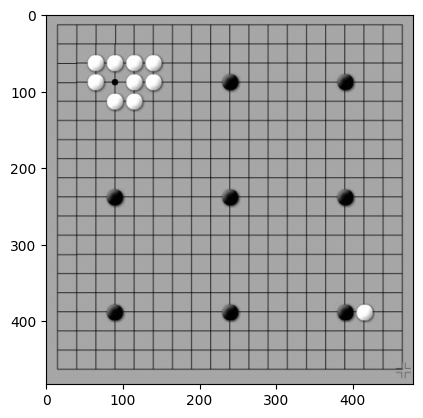

In [5]:
img = cv.imread("img/weiqi.jpg")
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(gray,cmap="gray")

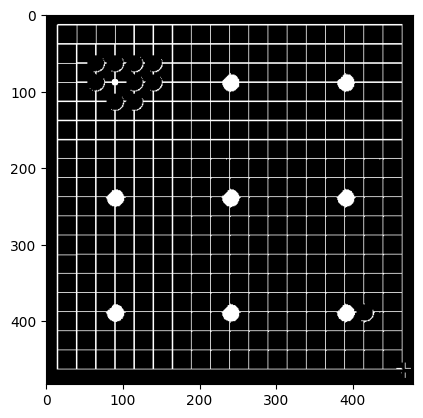

In [7]:
# 二值图
thresh,binary = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV | cv.THRESH_OTSU)
plt.imshow(binary,cmap="gray")

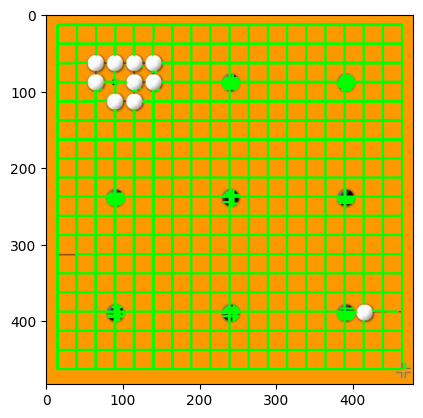

In [8]:
# 霍夫直线检测
rho = 1 # 距离分辨率，查找像素位置的步长
theta = np.pi/180 # 弧度
threshold = 10 # 返回的直线，至少包含10个像素点
lines = cv.HoughLinesP(binary,rho,theta,threshold,minLineLength=1,maxLineGap=3)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv.line(img,(x1,y1),(x2,y2),(0,255,0),2)
imshow(img)

## 霍夫圆

In [13]:
img = cv.imread("img/weiqi.jpg")
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
method = cv.HOUGH_GRADIENT # 检测算法
dp = 1 # 步长
minDist = 10 # 圆心之间最小的距离
param1 = 70 # canny边缘检测算法的高通阈值
param2 = 30 # 累加器阈值，一个圆至少要包含30个点
minRadius = 0 # 最小半径
maxRadius = 20 # 最大半径
circles = cv.HoughCircles(gray,method,dp,minDist,param1=param1,param2=param2,minRadius=minRadius,maxRadius=maxRadius)

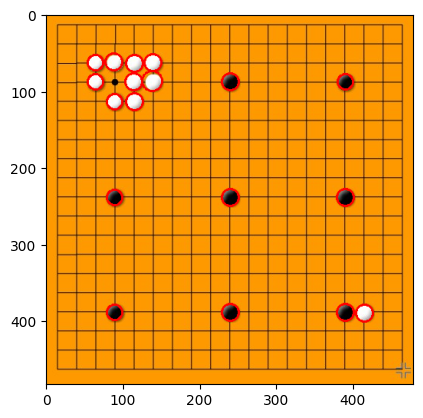

In [14]:
dst = img.copy()
for circle in circles[0]:
    x,y,r = np.intp(circle)
    cv.circle(dst,(x,y),r,(0,0,255),2)
imshow(dst)